In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
X = pd.read_csv("/content/drive/MyDrive/secom/secom.data", sep='\s+', header=None)

print("Features shape:", X.shape)
print(X.head())

Features shape: (1567, 590)
       0        1          2          3       4      5         6       7    \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

      8       9    ...     580       581     582     583     584      585  \
0  1.5005  0.0162  ...     NaN       NaN  0.5005  0.0118  0.0035   2.3630   
1  1.4966 -0.0005  ...  0.0060  208.2045  0.5019  0.0223  0.0055   4.4447   
2  1.4436  0.0041  ...  0.0148   82.8602  0.4958  0.0157  0.0039   3.1745   
3  1.4882 -0.0124  ...  0.0044   73.8432  0.4990  0.0103  0.0025   2.0544   
4  1.5031 -0.0031  ...     NaN       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  
0 

In [4]:
y = pd.read_csv("/content/drive/MyDrive/secom/secom_labels.data", sep='\s+', header=None)
y.columns = ['label', 'timestamp']

print("Labels shape:", y.shape)
print(y['label'].value_counts())

Labels shape: (1567, 2)
label
-1    1463
 1     104
Name: count, dtype: int64


In [5]:
df = pd.concat([y, X], axis=1)

# Rename features for convenience
df.columns = ['label', 'timestamp'] + [f'f{i}' for i in range(1, X.shape[1] + 1)]

print("Combined shape:", df.shape)
print(df.head())

Combined shape: (1567, 592)
   label            timestamp       f1       f2         f3         f4      f5  \
0     -1  19/07/2008 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     -1  19/07/2008 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2      1  19/07/2008 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     -1  19/07/2008 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     -1  19/07/2008 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   

      f6        f7      f8  ...    f581      f582    f583    f584    f585  \
0  100.0   97.6133  0.1242  ...     NaN       NaN  0.5005  0.0118  0.0035   
1  100.0  102.3433  0.1247  ...  0.0060  208.2045  0.5019  0.0223  0.0055   
2  100.0   95.4878  0.1241  ...  0.0148   82.8602  0.4958  0.0157  0.0039   
3  100.0  104.2367  0.1217  ...  0.0044   73.8432  0.4990  0.0103  0.0025   
4  100.0  100.3967  0.1235  ...     NaN       NaN  0.4800  0.4766  0.1045   

      f586    f587    

In [6]:
df

,label,timestamp,f1,f2,f3,f4,f5,f6,f7,f8,...,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590
0,-1,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1,16/10/2008 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,-1,16/10/2008 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,-1,17/10/2008 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,-1,17/10/2008 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [7]:
df.isna().sum()

,0
label,0
timestamp,0
f1,6
f2,7
f3,14
...,...
f586,1
f587,1
f588,1
f589,1


In [8]:

# Handling Null values replacing them with avg of that column

features = df.iloc[:, 2:]
features_filled = features.apply(lambda col: col.fillna(col.mean()), axis=0)
df_clean = pd.concat([df[['label', 'timestamp']], features_filled], axis=1)
print("Any remaining NaNs?", df_clean.isnull().sum().sum() > 0)


Any remaining NaNs? False


In [9]:
features = df_clean.loc[:, 'f1':'f590']
# Defining Features

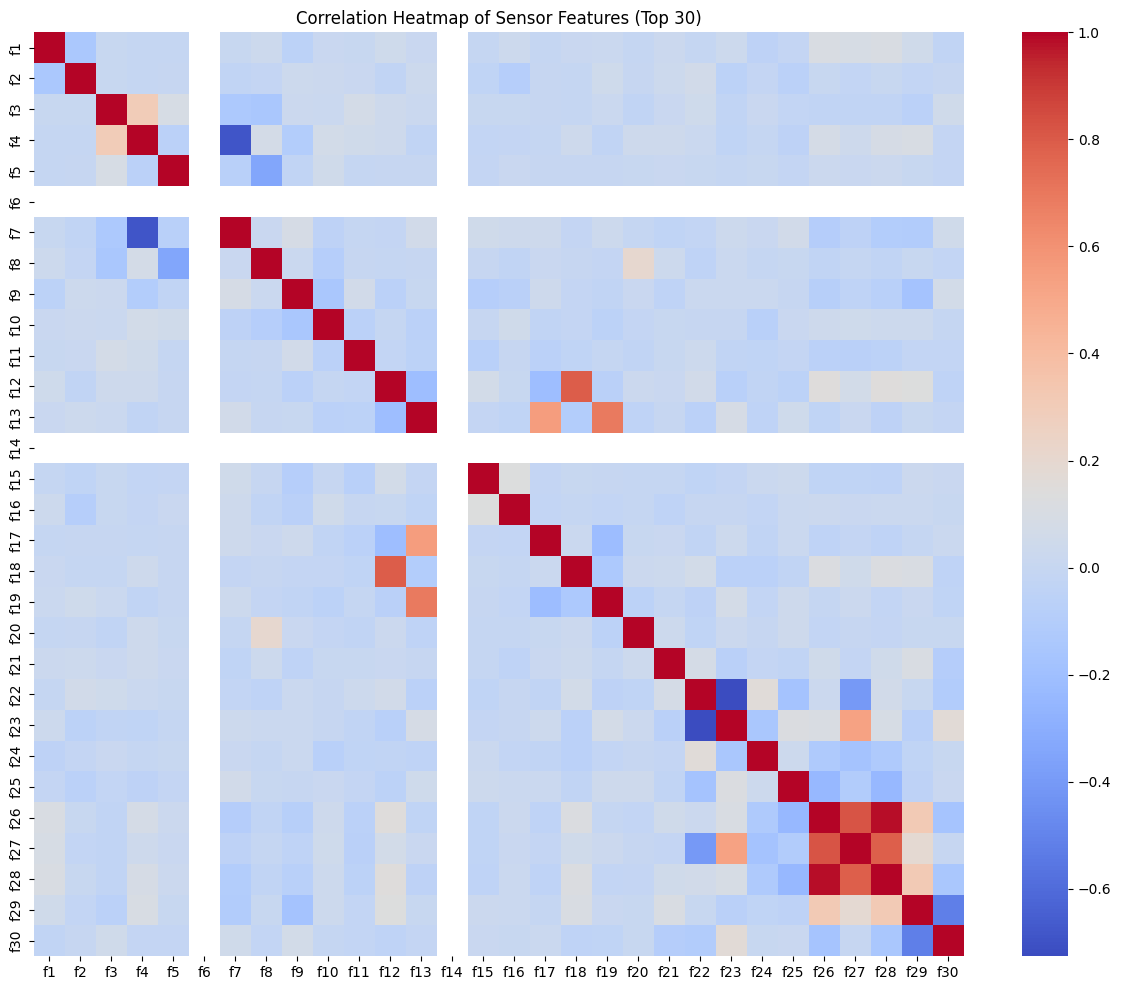

In [10]:
corr_matrix = features.corr()

# Plot correlation heatmap (limited to top 30 features for readability)
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix.iloc[:30, :30], cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Sensor Features (Top 30)")
plt.show()

In [11]:
# Getting High Corr Featues for Ref
threshold = 0.9
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() > threshold]

print(high_corr_pairs)

       Feature1 Feature2  Correlation
2014         f5     f141     0.999975
2113         f5     f276     0.999976
2216         f5     f414     0.938416
6656        f17     f149     0.970294
6659        f17     f153     0.977566
...         ...      ...          ...
112046     f580     f581     0.975470
112080     f584     f585     0.994771
112081     f584     f586     0.999890
112086     f585     f586     0.995342
112098     f588     f589     0.974276

[396 rows x 3 columns]


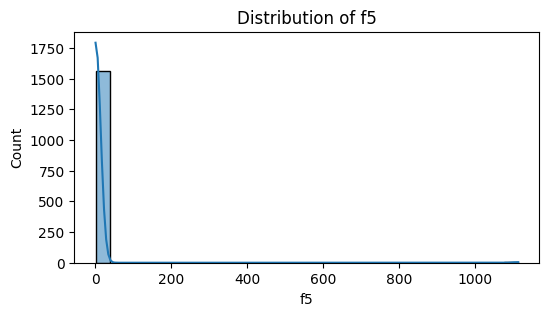

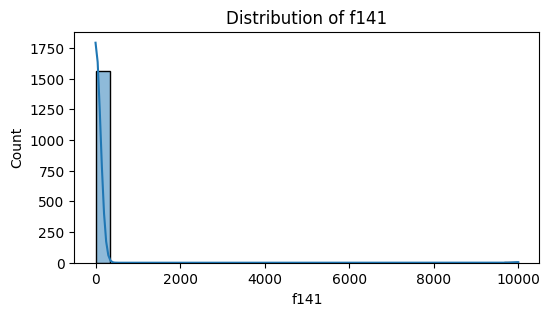

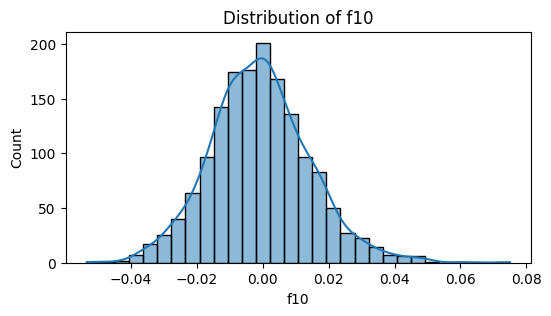

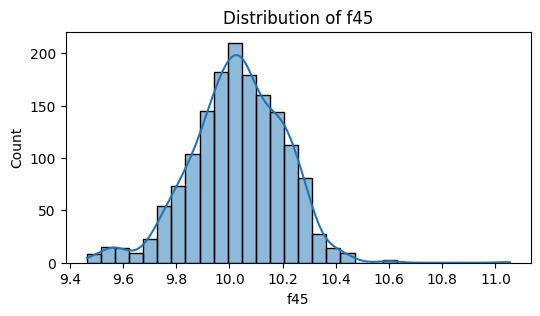

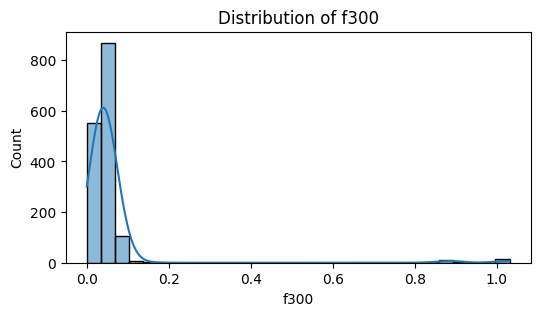

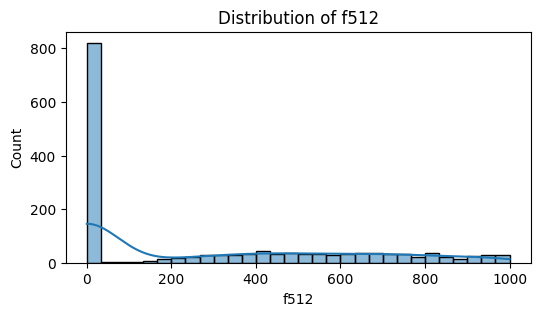

In [12]:
# Viz of Features(limited)

top_features = ['f5','f141','f10', 'f45', 'f300', 'f512']

for feat in top_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_clean[feat], kde=True, bins=30)
    plt.title(f"Distribution of {feat}")
    plt.show()


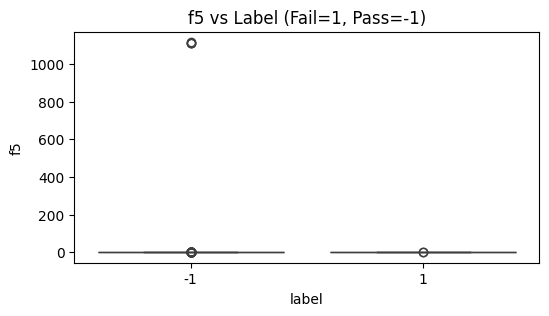

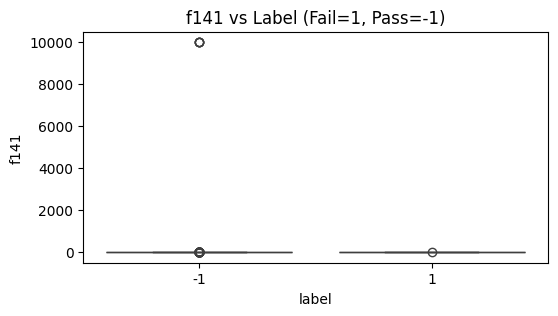

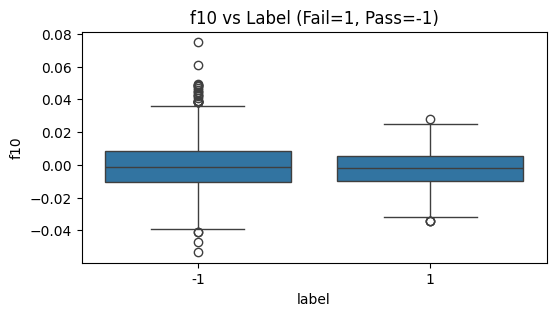

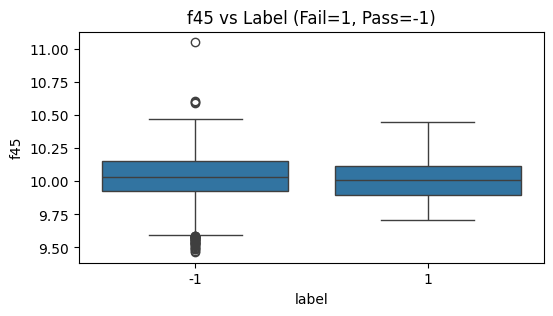

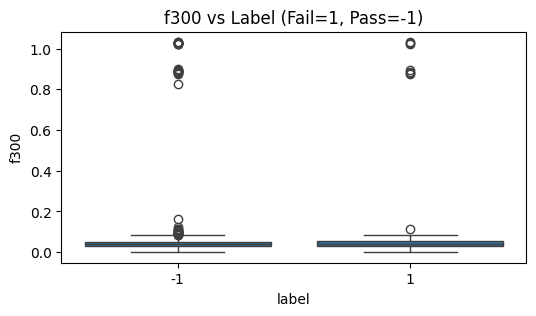

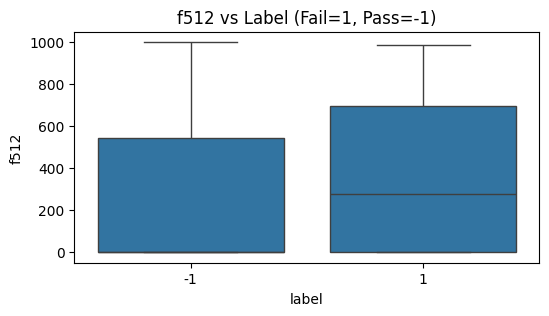

In [13]:
for feat in top_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='label', y=feat, data=df_clean)
    plt.title(f"{feat} vs Label (Fail=1, Pass=-1)")
    plt.show()


**Data PreProcessing**

In [14]:
# Scaling Data points
from sklearn.preprocessing import StandardScaler

X = df_clean.loc[:, 'f1':'f590']
y = df_clean['label'].map({-1: 0, 1: 1})  # Binary classification: 0=pass, 1=fail

# Fill any remaining NaNs (if any)
X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Feature Ranking**

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

f_selector = SelectKBest(score_func=f_classif, k=40)
f_selector.fit(X_train, y_train)

f_scores = f_selector.scores_
f_indices = np.argsort(f_scores)[-40:][::-1]
top_f_features = X.columns[f_indices]

print("Top 10 F-Test Features:\n", top_f_features[:10])


Top 10 F-Test Features:
 Index(['f374', 'f375', 'f329', 'f328', 'f327', 'f187', 'f326', 'f236', 'f499',
       'f323'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  5  13  42  49  52  69  97 141 149 178 179 186 189 190 191 192 193 194
 226 229 230 231 232 233 234 235 236 237 240 241 242 243 256 257 258 259
 260 261 262 263 264 265 266 276 284 313 314 315 322 325 326 327 328 329
 330 364 369 370 371 372 373 374 375 378 379 380 381 394 395 396 397 398
 399 400 401 402 403 404 414 422 449 450 451 458 461 462 463 464 465 466
 481 498 501 502 503 504 505 506 507 508 509 512 513 514 515 528 529 530
 531 532 533 534 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [17]:
X_train_selected = f_selector.transform(X_train)
X_test_selected = f_selector.transform(X_test)

In [18]:
# Get the selected column indices and names
selected_indices = f_selector.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]


Dealing with Class Imbalance First method scale_pos_weight

In [19]:
import numpy as np
from xgboost import XGBClassifier


# Compute class distribution
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")


scale_pos_weight: 14.66


In [22]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:56:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, model.predict(X_test_selected)))
print(classification_report(y_test, model.predict(X_test_selected), digits=4))


[[281   9]
 [ 21   3]]
              precision    recall  f1-score   support

           0     0.9305    0.9690    0.9493       290
           1     0.2500    0.1250    0.1667        24

    accuracy                         0.9045       314
   macro avg     0.5902    0.5470    0.5580       314
weighted avg     0.8785    0.9045    0.8895       314



In [24]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_selected)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

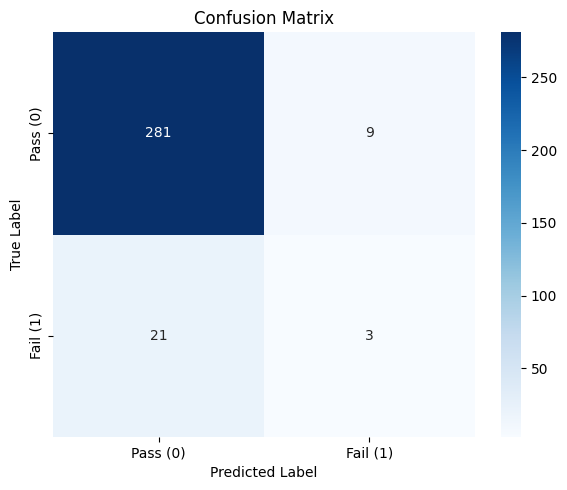

In [25]:
# Define labels
labels = ['Pass (0)', 'Fail (1)']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


Second method for dealing with class imbalance SMOTE

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)


In [27]:
model1 = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

model1.fit(X_train_balanced, y_train_balanced)
y_pred1 = model.predict(X_test_selected)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:57:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [28]:
print(confusion_matrix(y_test, model.predict(X_test_selected)))
print(classification_report(y_test, model.predict(X_test_selected), digits=4))

[[281   9]
 [ 21   3]]
              precision    recall  f1-score   support

           0     0.9305    0.9690    0.9493       290
           1     0.2500    0.1250    0.1667        24

    accuracy                         0.9045       314
   macro avg     0.5902    0.5470    0.5580       314
weighted avg     0.8785    0.9045    0.8895       314



Creating Pipeline for SMOTE

In [29]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k=40)),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])


In [30]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  5  13  42  49  52  69  97 141 149 178 179 186 189 190 191 192 193 194
 226 229 230 231 232 233 234 235 236 237 240 241 242 243 256 257 258 259
 260 261 262 263 264 265 266 276 284 313 314 315 322 325 326 327 328 329
 330 364 369 370 371 372 373 374 375 378 379 380 381 394 395 396 397 398
 399 400 401 402 403 404 414 422 449 450 451 458 461 462 463 464 465 466
 481 498 501 502 503 504 505 506 507 508 509 512 513 514 515 528 529 530
 531 532 533 534 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:01:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label

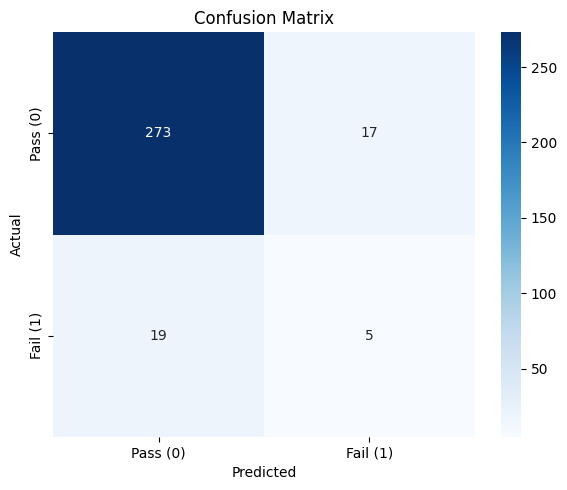

              precision    recall  f1-score   support

           0     0.9349    0.9414    0.9381       290
           1     0.2273    0.2083    0.2174        24

    accuracy                         0.8854       314
   macro avg     0.5811    0.5749    0.5778       314
weighted avg     0.8808    0.8854    0.8831       314



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pass (0)', 'Fail (1)'], yticklabels=['Pass (0)', 'Fail (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred, digits=4))


<ipython-input-32-a43e0ee1bfda>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='coolwarm')


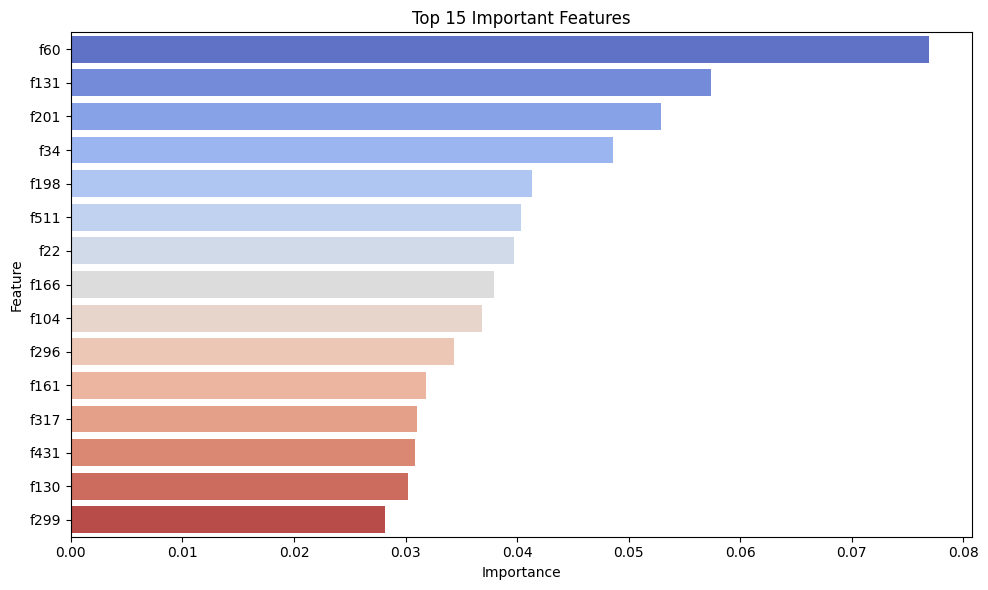

In [32]:
# Feature Importance plot

# Get feature names after selection
feature_selector = pipeline.named_steps['feature_selection']
selected_indices = feature_selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

# Get feature importances
model = pipeline.named_steps['model']
importances = model.feature_importances_

# Create a DataFrame
import pandas as pd

feat_imp_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='coolwarm')
plt.title("Top 15 Important Features")
plt.tight_layout()
plt.show()


Final Accuracy is 88%